In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 0: Data Preparation & EDA

## Reading Edges

In [55]:
EDGES_PATH = "dataset/wikivote_subgraph_A_edges.tsv"

edges_A = pd.read_csv(EDGES_PATH, sep="\t")
edges_A.head()

,src,dst
0,0,3
1,0,13
2,0,30
3,0,53
4,0,118


## 0-1: Checking Nodes & Edges

In [56]:
num_edges_A = len(edges_A)
num_nodes_A = int(max(edges_A["src"].max(), edges_A["dst"].max()) + 1)

print(f"Number of nodes: {num_nodes_A}")
print(f"Number of edges: {num_edges_A}")

Number of nodes: 500
Number of edges: 12691


## 0-2: in-degree & out-degree calculation

In [57]:
out_degree_A = np.zeros(num_nodes_A, dtype=np.int64)
in_degree_A = np.zeros(num_nodes_A, dtype=np.int64)

for u, v in edges_A.itertuples(index=False):
    out_degree_A[u] += 1
    in_degree_A[v] += 1


in_stats = {"max": int(np.max(in_degree_A)), "mean": float(np.mean(in_degree_A)), "median": float(np.median(in_degree_A)),
            "zero_percent": float(np.sum(in_degree_A == 0) / len(in_degree_A) * 100)}

out_stats = {"max": int(np.max(out_degree_A)), "mean": float(np.mean(out_degree_A)), "median": float(np.median(out_degree_A)),
            "zero_percent": float(np.sum(out_degree_A == 0) / len(out_degree_A) * 100)}

summary_df = pd.DataFrame.from_dict({"In-degree": in_stats, "Out-degree": out_stats}, orient="index")
summary_df

,max,mean,median,zero_percent
In-degree,95,25.382,22.0,0.0
Out-degree,499,25.382,7.0,25.6


## dangling nodes (out-degree = 0)

In [58]:
dangling_nodes = np.sum(out_degree_A == 0)
dangling_percent = dangling_nodes / num_nodes_A * 100

print(f"Dangling nodes: {dangling_nodes}")
print(f"Dangling percent: {dangling_percent} %")

Dangling nodes: 128
Dangling percent: 25.6 %


## 0-3: Checking Self Loops

In [59]:
num_self_loops = (edges_A["src"] == edges_A["dst"]).sum()
edges_A = edges_A[edges_A["src"] != edges_A["dst"]]

print(f"Number of self-loops removed: {num_self_loops}")

Number of self-loops removed: 0


## 0-4: Nodes based on Top-20

### Top-20 for in-degree

In [60]:
def top_k_nodes(deg, k=20):
    idx = np.argsort(-deg)
    top_list = list(zip(idx[:k], deg[idx[:k]]))

    top_return_list = []
    for node, d in top_list:
        top_return_list.append({'Node':node, 'Degree': d})
    return top_return_list


top20_in_df = pd.DataFrame(top_k_nodes(in_degree_A, 20))
top20_in_df

,Node,Degree
0,121,95
1,168,92
2,448,87
3,322,86
4,132,83
5,338,76
6,13,76
7,88,75
8,176,74
9,155,73


### Top-20 for out-degree

In [61]:
top20_out_df = pd.DataFrame(top_k_nodes(out_degree_A, 20))
top20_out_df

,Node,Degree
0,155,499
1,53,267
2,27,266
3,36,228
4,226,215
5,322,206
6,171,204
7,141,198
8,105,182
9,191,180


## 0-5: Rank-Degree(log-log) plot

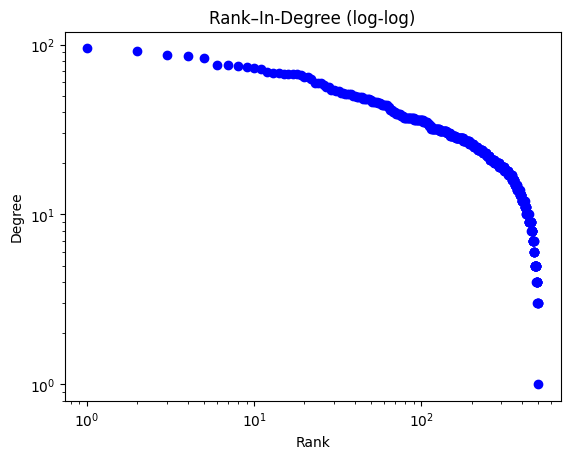

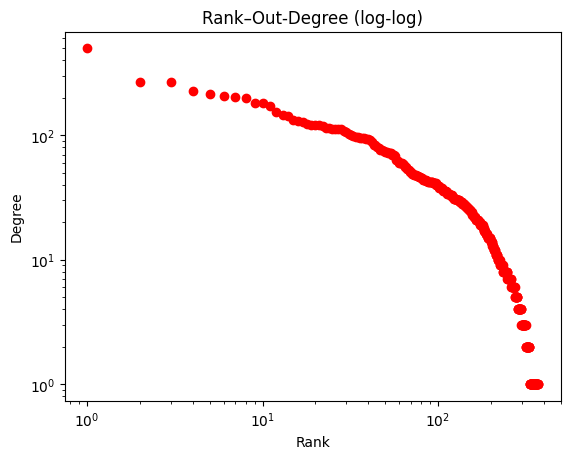

In [62]:
def plot_rank_degree(deg, title, color):
    sorted_deg = np.sort(deg)[::-1]
    ranks = np.arange(1, len(sorted_deg) + 1)

    mask = sorted_deg > 0
    plt.figure()
    plt.loglog(ranks[mask], sorted_deg[mask], marker='o', linestyle='None', color=color)
    plt.xlabel("Rank")
    plt.ylabel("Degree")
    plt.title(title)
    plt.show()

plot_rank_degree(in_degree_A, "Rank–In-Degree (log-log)", 'blue')
plot_rank_degree(out_degree_A, "Rank–Out-Degree (log-log)", 'red')

# Step 1: Dense PageRank on WikiVote Subgraphs

## 1-1: Load edges and Preprocessing of B

In [63]:
EDGES_PATH_B = "dataset/wikivote_subgraph_B_edges.tsv"

edges_B = pd.read_csv(EDGES_PATH_B, sep="\t")
edges_B.head()

,src,dst
0,11,0
1,11,1
2,11,9
3,11,14
4,11,15


In [64]:
num_edges_B = len(edges_B)
num_nodes_B = int(max(edges_B["src"].max(), edges_B["dst"].max()) + 1)

print(f"Number of nodes: {num_nodes_B}")
print(f"Number of edges: {num_edges_B}")

Number of nodes: 500
Number of edges: 14951


In [65]:
out_degree_B = np.zeros(num_nodes_B, dtype=np.int64)
in_degree_B = np.zeros(num_nodes_B, dtype=np.int64)

for u, v in edges_B.itertuples(index=False):
    out_degree_B[u] += 1
    in_degree_B[v] += 1


in_stats_B = {"max": int(np.max(in_degree_B)), "mean": float(np.mean(in_degree_B)), "median": float(np.median(in_degree_B)),
            "zero_percent": float(np.sum(in_degree_B == 0) / len(in_degree_B) * 100)}

out_stats_B = {"max": int(np.max(out_degree_B)), "mean": float(np.mean(out_degree_B)), "median": float(np.median(out_degree_B)),
             "zero_percent": float(np.sum(out_degree_B == 0) / len(out_degree_B) * 100)}

summary_df_B = pd.DataFrame.from_dict({"In-degree": in_stats_B, "Out-degree": out_stats_B}, orient="index")
summary_df_B

,max,mean,median,zero_percent
In-degree,169,29.902,27.5,36.0
Out-degree,178,29.902,23.0,0.0


In [66]:
dangling_nodes_B = np.sum(out_degree_B == 0)
dangling_percent_B = dangling_nodes_B / num_nodes_B * 100

print(f"Dangling nodes: {dangling_nodes_B}")
print(f"Dangling percent: {dangling_percent_B} %")

Dangling nodes: 0
Dangling percent: 0.0 %


In [67]:
num_self_loops_B = (edges_B["src"] == edges_B["dst"]).sum()
edges_B = edges_B[edges_B["src"] != edges_B["dst"]]

print(f"Number of self-loops removed: {num_self_loops_B}")

Number of self-loops removed: 0


## 1-2: Build Adjacency Matrix

In [68]:
n_A = int(max(edges_A["src"].max(), edges_A["dst"].max()) + 1)
m_A = len(edges_A)

A = np.zeros((n_A, n_A), dtype=np.float64)
for u, v in edges_A.itertuples(index=False):
    A[u, v] = 1.0


n_B = int(max(edges_B["src"].max(), edges_B["dst"].max()) + 1)
m_B = len(edges_B)

B = np.zeros((n_B, n_B), dtype=np.float64)
for u, v in edges_B.itertuples(index=False):
    B[u, v] = 1.0

## 1-3: Build Transition Matrix

In [69]:
out_degree_A = A.sum(axis=1)
out_degree_B = B.sum(axis=1)


num_deadends_A = np.sum(out_degree_A == 0)
num_deadends_B = np.sum(out_degree_B == 0)

print("Deadend nodes in A:", num_deadends_A)
print("Deadend nodes in A:", num_deadends_B)

Deadend nodes in A: 128
Deadend nodes in A: 0


In [70]:
P_A = np.zeros_like(A)

for i in range(n_A):
    if out_degree_A[i] > 0:
        P_A[i, :] = A[i, :] / out_degree_A[i]


P_B = np.zeros_like(B)

for i in range(n_B):
    if out_degree_B[i] > 0:
        P_B[i, :] = B[i, :] / out_degree_B[i]

In [71]:
P_A[:10, :10]

array([[0.        , 0.        , 0.        , 0.16666667, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.03448276, 0.03448276, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01666667, 0.        ,
        0.01666667, 0.        , 0.01666667, 0.01666667, 0.        ],
       [0.        , 0.        , 0.       

In [72]:
P_B[:10, :10]

array([[0.        , 0.01724138, 0.        , 0.01724138, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01724138],
       [0.04      , 0.        , 0.        , 0.04      , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04      ],
       [0.        , 0.08333333, 0.        , 0.08333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08333333],
       [0.06666667, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06666667],
       [0.00699301, 0.00699301, 0.        , 0.00699301, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00699301],
       [0.        , 0.07142857, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.05882353, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05882353],
       [0.025     , 0.        , 0.       

## 1-4: Basic PageRank (without deadend fix)
#### calculate the stationary distribution using Power Method

In [73]:
MAX_ITER = 10_000
eps = 1e-9
r = 0.15


def basic_pageRank(transition_matrix: np.ndarray, nodes: int, eps=1e-9, r=0.15, max_iteration=10_000):

    p = np.ones(nodes) / nodes
    teleport = np.ones(nodes) / nodes

    residuals = []
    for _ in range(max_iteration):
        p_next = (1 - r) * (transition_matrix.T @ p) + (r * teleport)
        residual = np.linalg.norm(p_next - p, 1)

        residuals.append(residual)
        p = p_next

        if residual < eps:
            return p, residuals


p_A, residuals_A = basic_pageRank(transition_matrix=P_A, nodes=n_A, eps=eps, r=r, max_iteration=MAX_ITER)
p_B, residuals_B = basic_pageRank(transition_matrix=P_B, nodes=n_B, eps=eps, r=r, max_iteration=MAX_ITER)

### Execution Report for Basic PageRank

In [79]:
print("residual_last for A:", residuals_A[-1])
print("Sum of PageRank values A:", p_A.sum())
print("Iteration on A:", len(residuals_A))

print("\nresidual_last for B:", residuals_B[-1])
print("Sum of PageRank values B:", p_B.sum())
print("Iteration on B:", len(residuals_B))

residual_last for A: 7.511420178885585e-10
Sum of PageRank values A: 0.4351006872259171
Iteration on A: 49

residual_last for B: 6.293526556020237e-10
Sum of PageRank values B: 0.9999999999999996
Iteration on B: 41


In [75]:
top10_A = np.argsort(-p_A)[:10]

top10_table_basic_page_rank_A = []
for rank, node in enumerate(top10_A, 1):
    top10_table_basic_page_rank_A.append({'Rank': rank, 'Node': node, 'Score': p_A[node]})

top10_table_basic_page_rank_A = pd.DataFrame(top10_table_basic_page_rank_A)
top10_table_basic_page_rank_A

,Rank,Node,Score
0,1,168,0.003736
1,2,88,0.003162
2,3,132,0.003141
3,4,322,0.003017
4,5,338,0.002998
5,6,121,0.002748
6,7,448,0.002704
7,8,468,0.002619
8,9,426,0.002438
9,10,498,0.002422


In [76]:
top10_B = np.argsort(-p_B)[:10]

top10_table_basic_page_rank_B = []
for rank, node in enumerate(top10_B, 1):
    top10_table_basic_page_rank_B.append({'Rank': rank, 'Node': node, 'Score': p_B[node]})

top10_table_basic_page_rank_B = pd.DataFrame(top10_table_basic_page_rank_B)
top10_table_basic_page_rank_B

,Rank,Node,Score
0,1,250,0.012321
1,2,265,0.011402
2,3,181,0.010663
3,4,318,0.010038
4,5,448,0.009008
5,6,336,0.008834
6,7,157,0.008833
7,8,242,0.008756
8,9,333,0.008525
9,10,92,0.008515


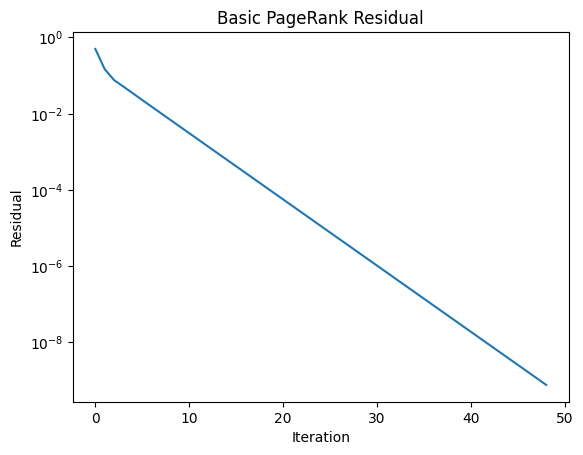

In [77]:
plt.figure()
plt.semilogy(residuals_A)
plt.xlabel("Iteration")
plt.ylabel("Residual")
plt.title("Basic PageRank Residual in A set")
plt.show()

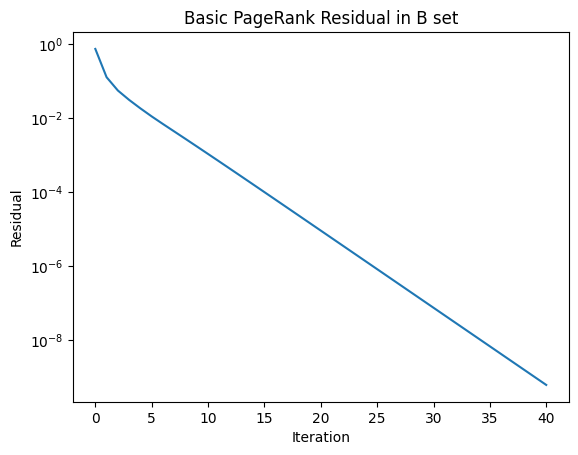

In [78]:
plt.figure()
plt.semilogy(residuals_B)
plt.xlabel("Iteration")
plt.ylabel("Residual")
plt.title("Basic PageRank Residual in B set")
plt.show()

## 1-5: PageRank (with deadend handling)
#### calculate the stationary distribution using Power Method

In [80]:
MAX_ITER = 10_000
eps = 1e-9
r = 0.15


def pageRank_deadend_fix(transition_matrix: np.ndarray, out_degree: np.ndarray, nodes: int, eps=1e-9, r=0.15, max_iteration=10_000):

    p = np.ones(nodes) / nodes
    teleport = np.ones(nodes) / nodes

    deadend_mask = (out_degree == 0)

    residuals = []
    for _ in range(max_iteration):
        leaked_mass = p[deadend_mask].sum()
        p_next = ((1 - r) * (transition_matrix.T @ p)) + ((1 - r) * (leaked_mass * teleport)) + (r * teleport)
        residual = np.linalg.norm(p_next - p, 1)

        residuals.append(residual)
        p = p_next

        if residual < eps:
            return p, residuals


p_A, residuals_A = pageRank_deadend_fix(transition_matrix=P_A, out_degree=out_degree_A, nodes=n_A, eps=eps, r=r, max_iteration=MAX_ITER)
p_B, residuals_B = pageRank_deadend_fix(transition_matrix=P_B, out_degree=out_degree_B, nodes=n_B, eps=eps, r=r, max_iteration=MAX_ITER)